<a href="https://colab.research.google.com/github/AviralTripathim22ma012/CV-2/blob/main/logomatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**METHOD_1: TEMPLATE MATCHING WITH ALL TH 6 METHODS** *(FAILLED)*

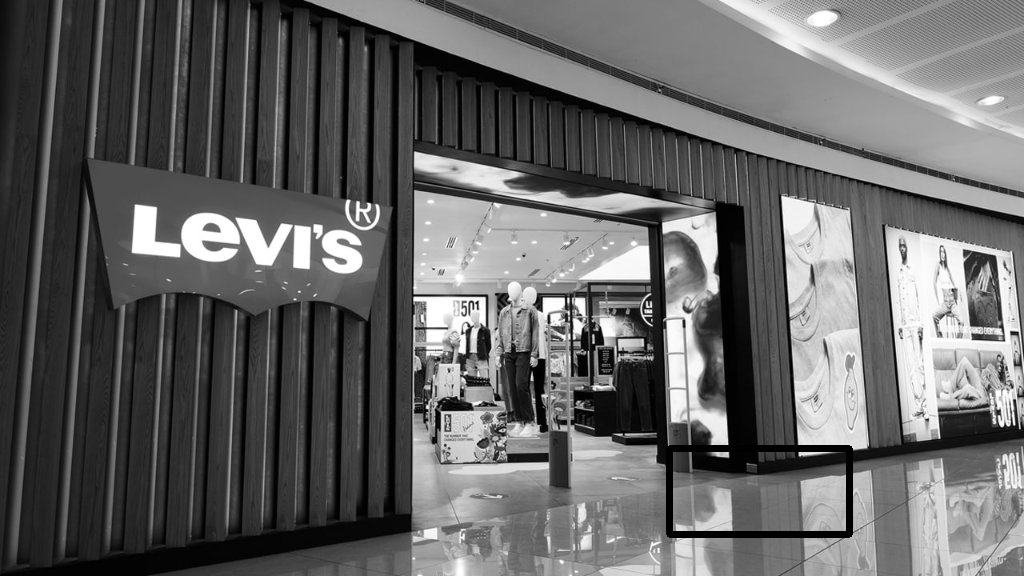

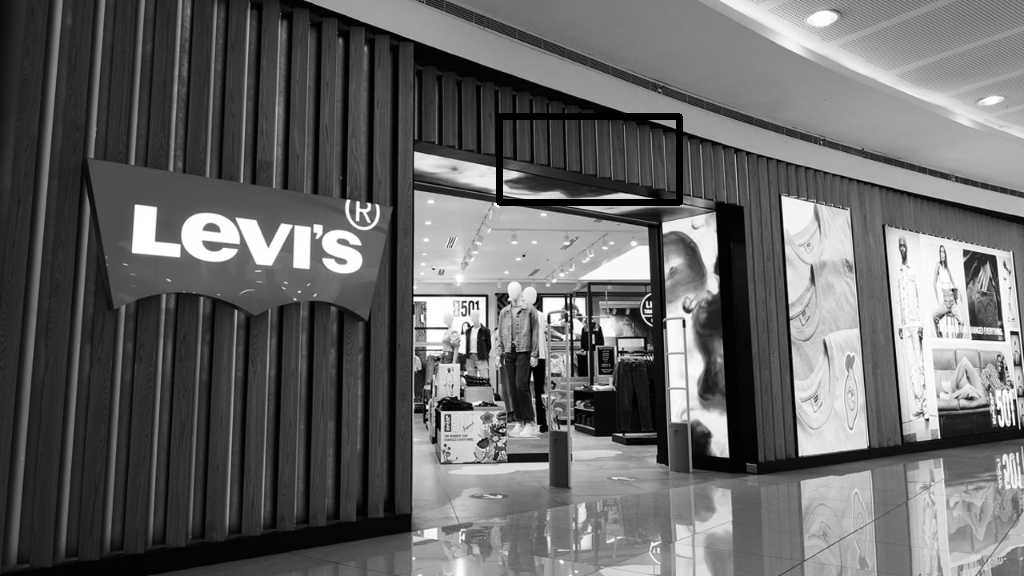

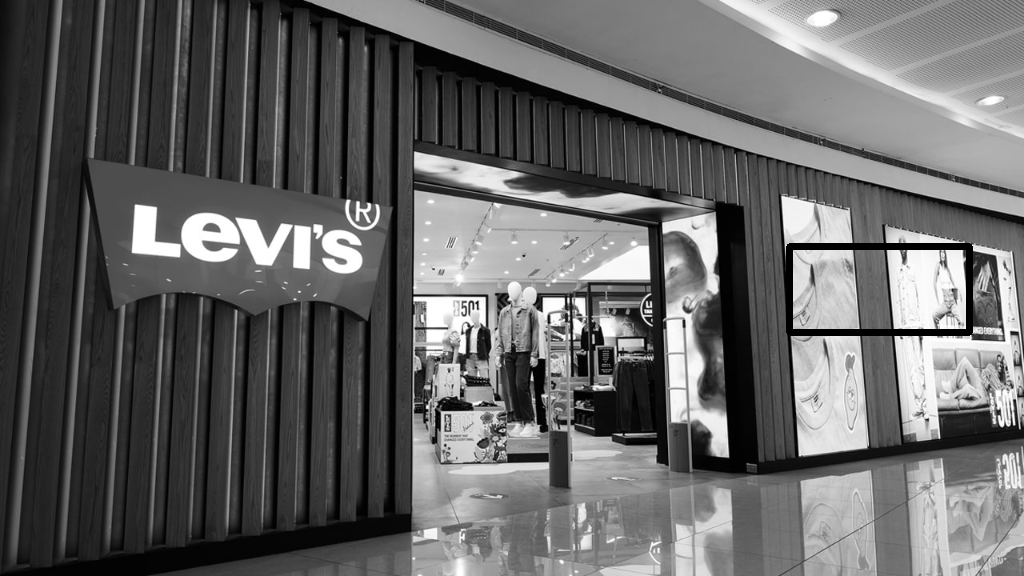

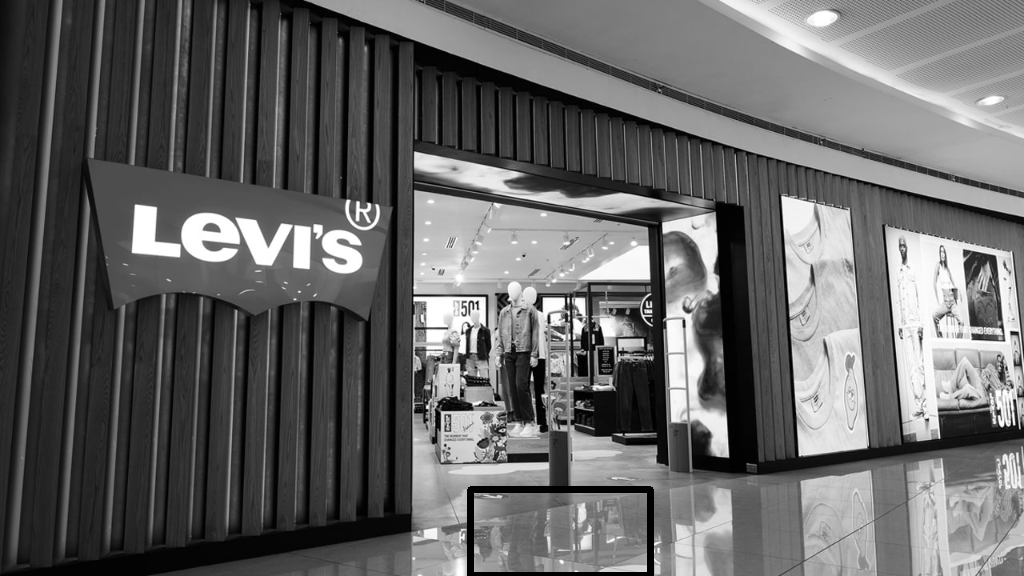

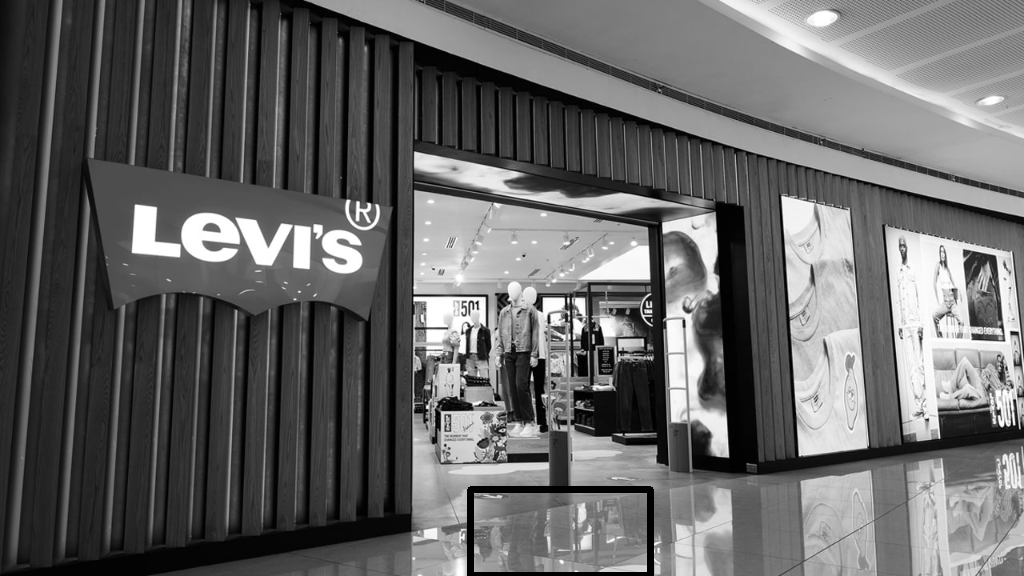

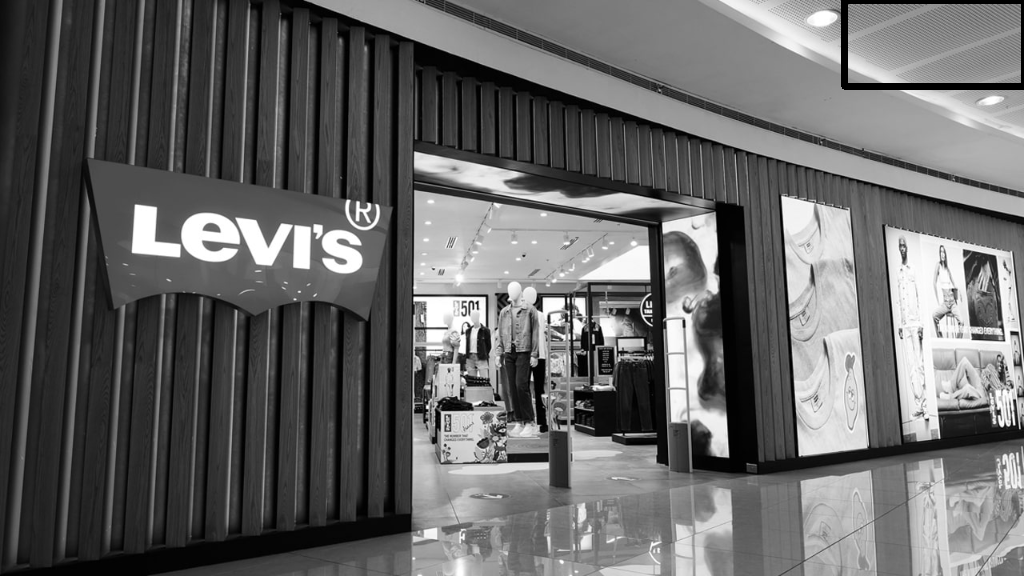

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.resize(cv2.imread('/content/levis.jpg', 0), (0, 0), fx=0.8, fy=0.8)
template = cv2.resize(cv2.imread('/content/levis (1).jpg', 0), (0, 0), fx=0.8, fy=0.8)
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
            cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

for method in methods:
    img2 = img.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)
    color = (0, 0, 0)
    cv2.rectangle(img2, location, bottom_right, color, 5)
    cv2_imshow(img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

**METHOD_2: CANNY EDGE DETECTION + TEMPLATE MATCHING** *(PARTIALLY WORKED)*

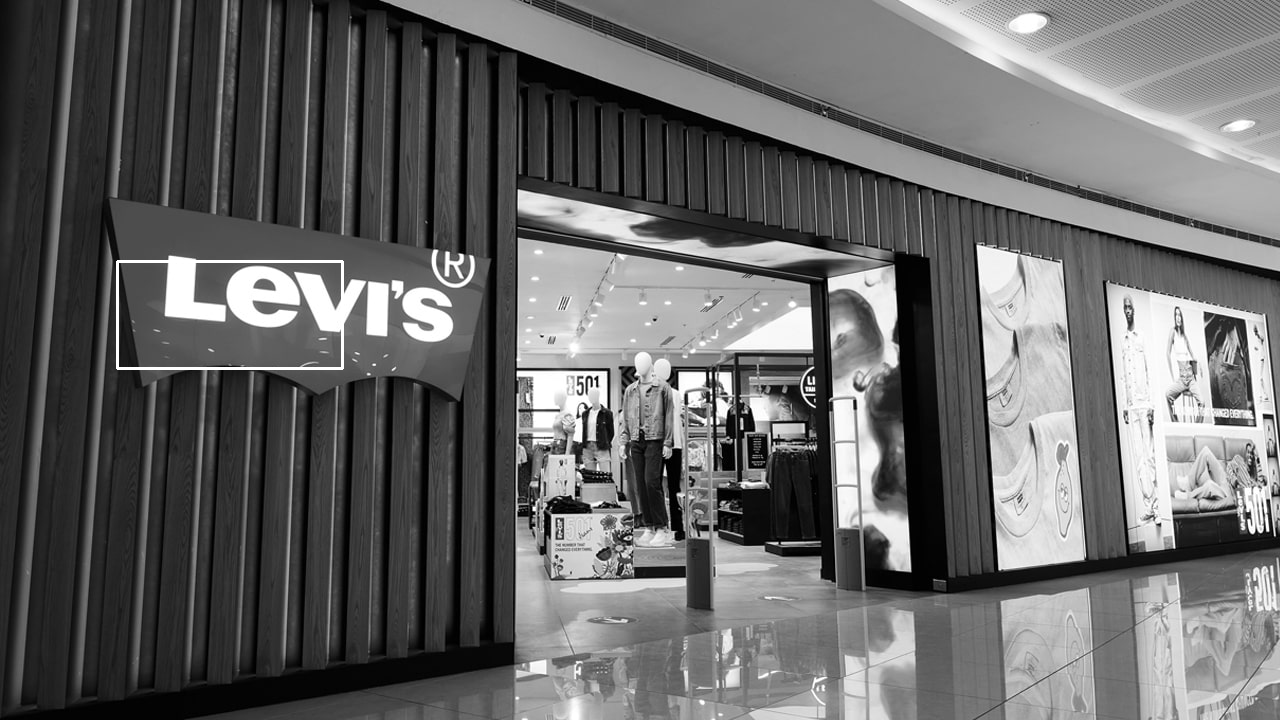

In [ ]:
import cv2
import numpy as np

'''Load the input image and the template image'''
img = cv2.imread('/content/levis.jpg', 0)
template = cv2.imread('/content/levis (1).jpg', 0)

'''Perform edge detection on the input image and the template'''
edges_img = cv2.Canny(img, 100, 200)
edges_template = cv2.Canny(template, 100, 200)

'''Get the dimensions of the template'''
w, h = edges_template.shape[::-1]

'''Match the template using template matching'''
result = cv2.matchTemplate(edges_img, edges_template, cv2.TM_CCOEFF_NORMED)

'''Get the location of the best match in the input image'''
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

'''Draw a rectangle around the matched region'''
cv2.rectangle(img, top_left, bottom_right, 255, 2)

'''Display the result'''
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


**SIFT** *(WORKED)*

**EX1**

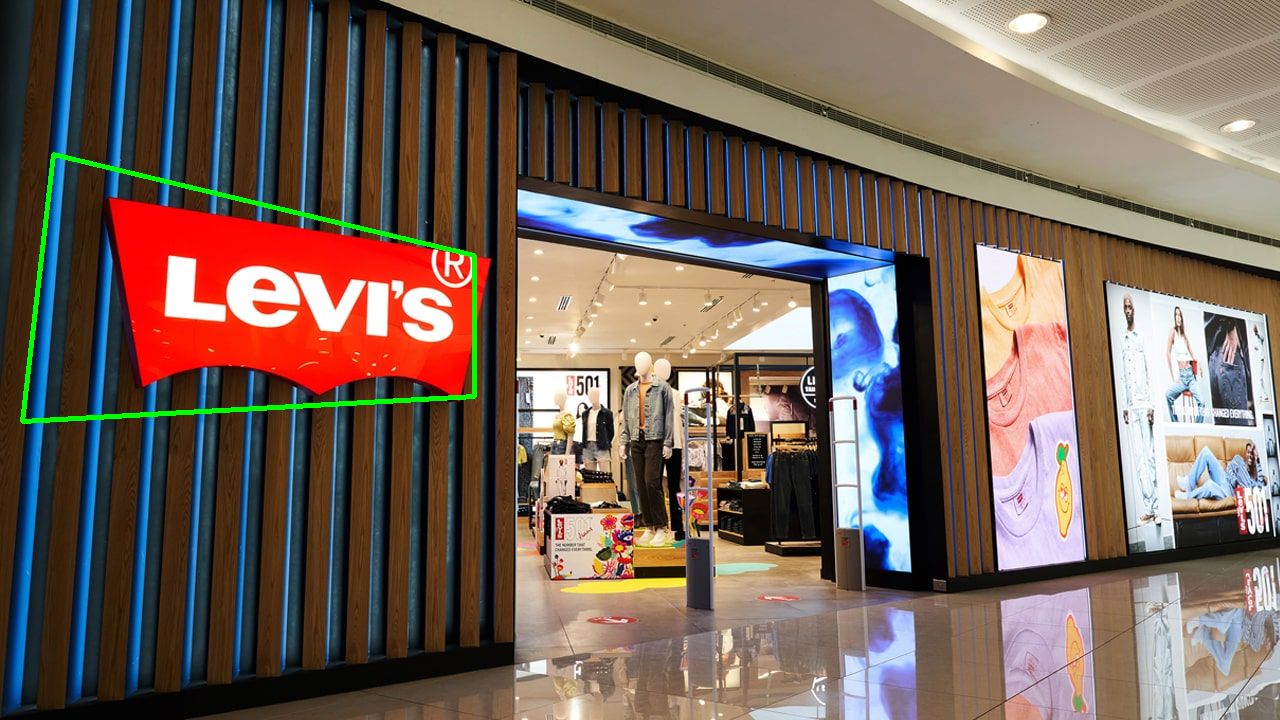

In [ ]:
import cv2

'''Load the input image and the template'''
img_scene = cv2.imread('/content/levis.jpg')
img_logo = cv2.imread('/content/levis (1).jpg')

'''Initialize the SIFT detector and FLANN matcher'''
sift = cv2.xfeatures2d.SIFT_create()
flann = cv2.FlannBasedMatcher({'algorithm': 0, 'trees': 5}, {'checks': 50})

'''Find the keypoints and descriptors in the input image and logo'''
kp_scene, des_scene = sift.detectAndCompute(img_scene, None)
kp_logo, des_logo = sift.detectAndCompute(img_logo, None)

'''Match the descriptors in the input image and logo'''
matches = flann.knnMatch(des_logo, des_scene, k=2)

'''Filter the matches using the Lowe's ratio test'''
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

'''Draw the matched keypoints'''
img_matches = cv2.drawMatches(img_logo, kp_logo, img_scene, kp_scene, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

'''Estimate the homography matrix using the matched keypoints'''
if len(good_matches) > 4:
    src_pts = np.float32([kp_logo[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_scene[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Extract the logo region from the input image using the homography matrix
    logo_h, logo_w, _ = img_logo.shape
    logo_corners = np.float32([[0, 0], [0, logo_h], [logo_w, logo_h], [logo_w, 0]]).reshape(-1, 1, 2)
    logo_corners_transformed = cv2.perspectiveTransform(logo_corners, H)
    img_scene = cv2.polylines(img_scene, [np.int32(logo_corners_transformed)], True, (0, 255, 0), 3)

'''Display the result'''
cv2_imshow(img_scene)
cv2.waitKey(0)
cv2.destroyAllWindows()


**EX2**

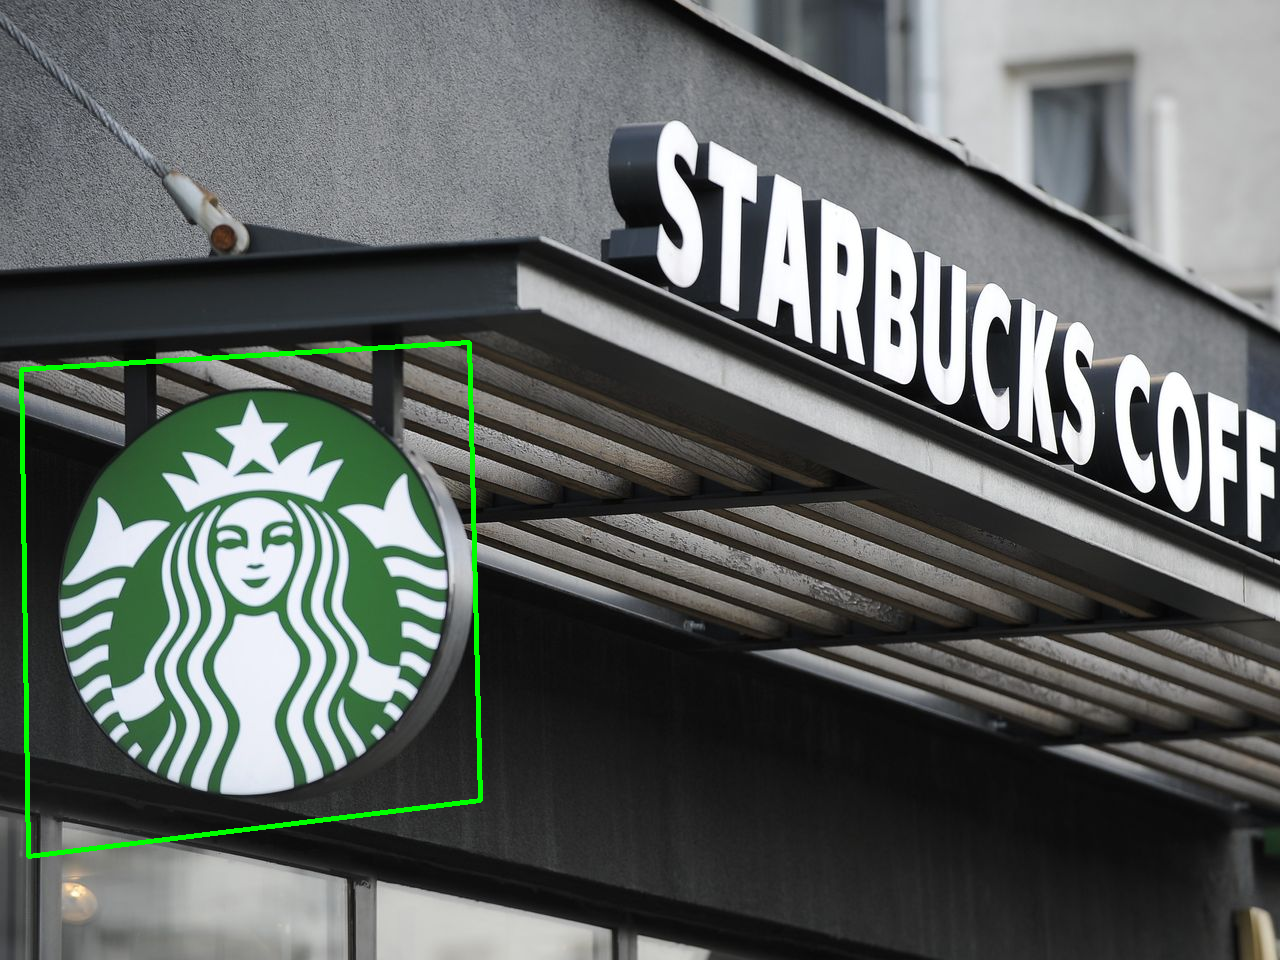

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

'''Load the input image and the template'''
img_scene = cv2.imread('/content/starbucks.jpeg')
img_logo = cv2.imread('/content/starbucks.jpg')

'''Initialize the SIFT detector and FLANN matcher'''
sift = cv2.xfeatures2d.SIFT_create()
flann = cv2.FlannBasedMatcher({'algorithm': 0, 'trees': 5}, {'checks': 50})

'''Find the keypoints and descriptors in the input image and logo'''
kp_scene, des_scene = sift.detectAndCompute(img_scene, None)
kp_logo, des_logo = sift.detectAndCompute(img_logo, None)

'''Match the descriptors in the input image and logo'''
matches = flann.knnMatch(des_logo, des_scene, k=2)

'''Filter the matches using the Lowe's ratio test'''
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

'''Draw the matched keypoints'''
img_matches = cv2.drawMatches(img_logo, kp_logo, img_scene, kp_scene, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

'''Estimate the homography matrix using the matched keypoints'''
if len(good_matches) > 4:
    src_pts = np.float32([kp_logo[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp_scene[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

    # Extract the logo region from the input image using the homography matrix
    logo_h, logo_w, _ = img_logo.shape
    logo_corners = np.float32([[0, 0], [0, logo_h], [logo_w, logo_h], [logo_w, 0]]).reshape(-1, 1, 2)
    logo_corners_transformed = cv2.perspectiveTransform(logo_corners, H)
    img_scene = cv2.polylines(img_scene, [np.int32(logo_corners_transformed)], True, (0, 255, 0), 3)

'''Display the result'''
cv2_imshow(img_scene)
cv2.waitKey(0)
cv2.destroyAllWindows()
